<a href="https://colab.research.google.com/github/ANGELA-NYUTU/Hass-Consulting-Company-Data-Analysis/blob/main/Moringa_Data_Science_Core_WEEK_7_Independent_Project_2021_10_Angela_Nyutu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hass Consulting Company: Data Analysis**

## **Objective:**
To study the factors that affect housing prices and create a model that would allow the company to accurately predict the prices given the predictor variablesi.e.property specs. 

## **Metric for Success**
Develop a suitable model to predict property prices with an accuracy of atleast 70% 


## **Context**
The data is collected showing prices of various properties given the house features such as the square footage of the lot, number of stories, number of bathrooms and bedrooms, grade,and zipcode among others. The data has 21613 rows and 20 columns. This data will be used to create a model that accurately predict the prices of properties give the features

## **Experimental Design**

Several experimental designs will be used i.e.:
a.Exploratory data analysis
b.regression anlysis with several models

## **Dataset Loading and Preview**

### **Importing Libraries**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2
from scipy.stats import bartlett

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Loading the Dataset**

In [2]:
houseprices_df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

**Dataset Preview**

Top of the dataframe

In [3]:
houseprices_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Bottom of the Dataframe

In [4]:
houseprices_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Size

In [5]:
#Checking for the shape of the dataframe
print('The dataset has'+ str (houseprices_df.columns.shape)+'columns and' +str (houseprices_df.index.shape) +'rows')

The dataset has(20,)columns and(21613,)rows


In [6]:
houseprices_df.index.shape

(21613,)

Data Types

In [7]:
#Checking for data types
houseprices_df.dtypes
#It appears that the dataframe has got only numerical data.

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Columns

In [8]:
#Viewing the column names in the dataframe
houseprices_df.columns.unique()

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## **Dataset Cleaning**

**Missing Values**

In [85]:
houseprices_df.isnull().values.sum()
#The dataframe has no missing values

0

**Duplicated Values**

In [10]:
houseprices_df.duplicated().values.sum()
#There are three duplicated values

3

In [11]:
#Dropping the duplicates
houseprices_df.drop_duplicates(inplace=True)
houseprices_df.duplicated().values.sum()

0

**Outliers**

In [12]:
#Drop unnecessary columns
houseprices_df.drop('id',axis=1,inplace=True)

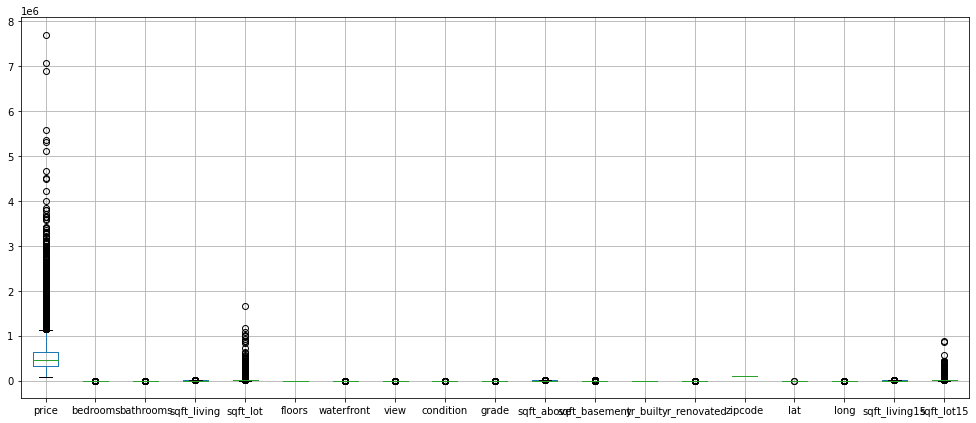

In [13]:
#Checking for outliers
houseprices_df.boxplot(figsize=(17,7))
#Outliers appear in columns prices,sqreft lot and sqrft living15. They will not be dropped because they lead to massive amounts of missing values.

**Columns**

In [14]:
#Tyding up the column names
houseprices_df.columns = houseprices_df.columns.str.strip().str.title().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [15]:
houseprices_df.columns.unique()

Index(['Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living', 'Sqft_Lot', 'Floors',
       'Waterfront', 'View', 'Condition', 'Grade', 'Sqft_Above',
       'Sqft_Basement', 'Yr_Built', 'Yr_Renovated', 'Zipcode', 'Lat', 'Long',
       'Sqft_Living15', 'Sqft_Lot15'],
      dtype='object')

##**Exploratory Data Analysis**

### **Univariate Analysis**

In [16]:
#Descibing the columns
houseprices_df.describe()

,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
#Mode number of bedrooms
houseprices_df['Bedrooms'].median()

3.0

In [18]:
def pie(df,column):
  data=df[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  pie=data.plot.pie(autopct='%.1f%%',labels=(df[column].unique()),startangle=0)
  plt.axis('equal')
  plt.show()
  return plt.show()

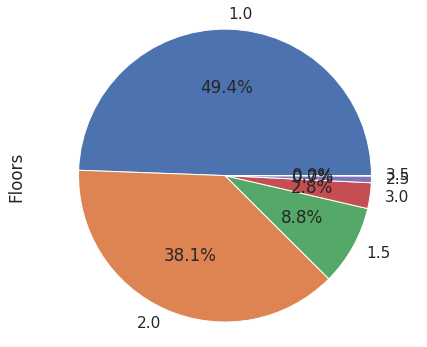

In [19]:
pie(houseprices_df,'Floors')

49.4% of the properties have a 1 floor,38.1% have 2 floors,2.8% have 3 floors,8.8 have 1.5 floors and 0.7% properties have 2.5 floors

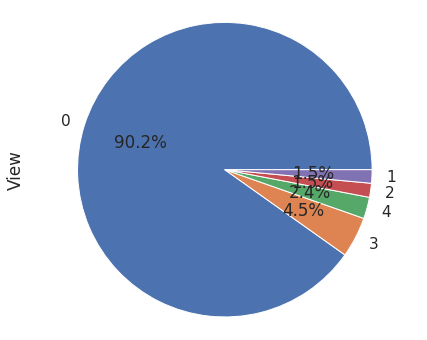

In [20]:
pie(houseprices_df,'View')

90.2% of the properties have not been viewed, while 4.5% have had 3 viewings,2.4% having been views twice and 1.5% having been viewed once

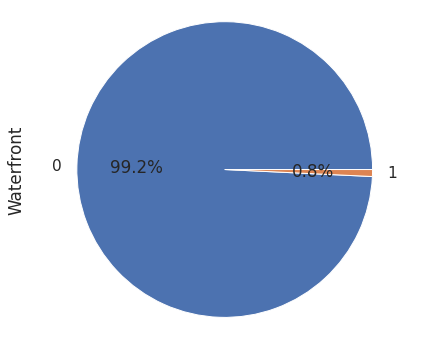

In [21]:
pie(houseprices_df,'Waterfront')

Only 0.8% properties have a waterfront view

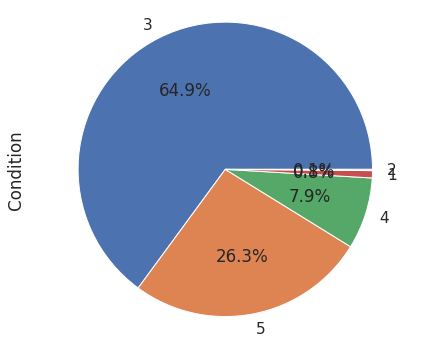

In [22]:
pie(houseprices_df,'Condition')

Properties are of diiferent conditions i.e. 1,2,3,4,5. 64.9% of these properties are in condition rank 3,26% being in rank no5,7.9% properties having been ranked at condition 4.

### **Bivariate Analysis**

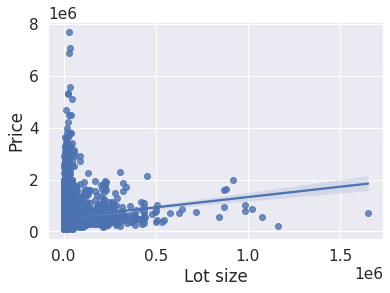

In [23]:
sns.regplot(x=houseprices_df['Sqft_Lot'],y=houseprices_df['Price'], fit_reg=True)
plt.title=('Relationship between lot size and the price')
plt.xlabel('Lot size')
plt.ylabel('Price')
plt.show()


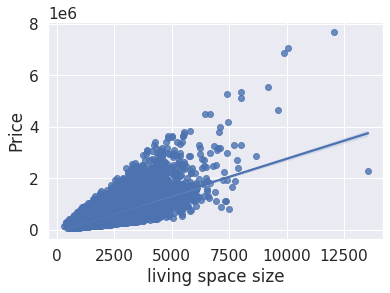

In [122]:
sns.regplot(x=houseprices_df['Sqft_Living'],y=houseprices_df['Price'], fit_reg=True)
plt.title=('Relationship between lot size and the price')
plt.xlabel('living space size')
plt.ylabel('Price')
plt.show()

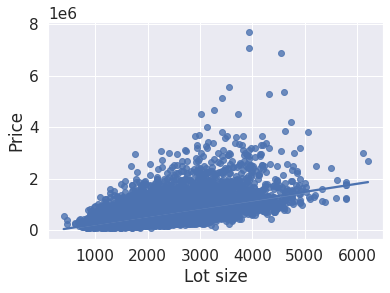

In [124]:
sns.regplot(x=houseprices_df['Sqft_Living15'],y=houseprices_df['Price'], fit_reg=True)
plt.title=('Relationship between lot size and the price')
plt.xlabel('Lot size')
plt.ylabel('Price')
plt.show()

### **Multivariate Analysis**

In [27]:
corr_matrix=houseprices_df.iloc[:,1:].corr()
corr_matrix

,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
Bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
Bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
Sqft_Living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
Sqft_Lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
Floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
Waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
View,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
Condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
Grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265
Sqft_Above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,-0.000823,0.343791,0.731870,0.194060


## **Regression Analysis**

### **Data Preparation**

**Variable Definition**

In [98]:
x=houseprices_df.iloc[:,1:].values
y=houseprices_df['Price'].values
x1=houseprices_df.iloc[:,1:]


**Dataset Splitting**

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Cross- Validation**

In [30]:
folds = KFold(n_splits=5)
#The split will use 5 folds
for train_index, test_index in folds.split(houseprices_df):
# set up the train and test based on the split determined by KFold
  Xtrain, Xtest = x[train_index], x[test_index]
  ytrain, ytest = y[train_index], y[test_index]

**Checking for Multicollinearity**

In [31]:
# Checking the Variance Inflation Factor in the independent variables x
pd.DataFrame(np.linalg.inv(corr_matrix.values), index = corr_matrix.index, columns=corr_matrix.columns)
#It appears that all the independent variables have low collinearity with VIF scores of below 5

,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
Bedrooms,1.652159,-0.461426,-6.117934e-01,0.049327,0.049848,0.063078,0.114430,-0.050633,0.306941,-3.230126e-01,-1.876431e-01,0.134509,0.045800,0.080174,0.050839,0.017554,0.025284,0.085416
Bathrooms,-0.461426,3.351248,-3.145315e+00,-0.024033,-0.675409,0.010097,-0.042387,-0.137265,-0.267927,1.566581e+00,4.380662e-01,-0.935745,-0.260436,0.041789,-0.041080,0.053741,0.092020,0.071444
Sqft_Living,-0.614071,-3.147130,1.814600e+13,-0.083509,2.726774,-0.075130,-0.011754,-0.174636,-1.944635,-1.636081e+13,-8.743992e+12,0.465651,0.157341,-0.351478,-0.055847,0.224682,-1.061709,-0.050719
Sqft_Lot,0.049327,-0.024033,-8.285028e-02,2.102526,0.045181,0.027369,-0.059109,0.030522,-0.053865,-1.245824e-01,-2.651796e-03,0.098734,0.021295,-0.002580,0.053339,-0.133206,0.163933,-1.459308
Floors,0.049848,-0.675409,2.727959e+00,0.045181,2.011974,-0.005524,-0.040067,0.089832,-0.230827,-2.964046e+00,-6.994371e-01,-0.481324,-0.079986,-0.170816,-0.127521,0.164281,0.272632,0.072657
Waterfront,0.063078,0.010097,-7.603136e-02,0.027369,-0.005524,1.203970,-0.492855,-0.012820,0.049272,-4.347535e-02,3.296960e-02,-0.021102,-0.065851,0.022562,0.009815,0.027241,0.054397,-0.018480
View,0.114430,-0.042387,-8.889906e-03,-0.059109,-0.040067,-0.492855,1.435320,-0.021126,-0.185270,4.729740e-02,-2.521202e-01,0.151685,-0.039119,-0.140639,0.118633,0.071934,-0.325388,-0.007469
Condition,-0.050633,-0.137265,-1.751460e-01,0.030522,0.089832,-0.012820,-0.021126,1.249500,-0.054508,2.132986e-01,-1.313328e-02,0.561510,0.206913,0.161279,0.063727,-0.006876,0.075908,-0.028242
Grade,0.306941,-0.267927,-1.945081e+00,-0.053865,-0.230827,0.049272,-0.185270,-0.054508,3.416981,1.441323e-01,4.509595e-01,-0.638907,-0.071472,0.083155,-0.330860,0.393716,-0.911600,0.071863
Sqft_Above,-0.321507,1.564435,-1.636081e+13,-0.124031,-2.962910,-0.044267,0.049941,0.212963,0.143654,1.475124e+13,7.883763e+12,0.100052,-0.142993,0.241261,0.231375,-0.544315,-0.578403,-0.129985


### **Multiple Linear Regression**

This will act as a baseline model

Multiple Linear regression with Train_test_split

In [32]:
le=LinearRegression()
le.fit(x_train,y_train)
y_pred=le.predict(x_test)
predicted_prices1=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
predicted_prices1

,Actual Price,Predicted Price
0,680200.0,674663.335440
1,550000.0,506948.946436
2,230000.0,264294.168405
3,379950.0,447935.440362
4,1060000.0,806982.269077
...,...,...
6478,268000.0,226343.813213
6479,430000.0,461937.583981
6480,400000.0,370373.358898
6481,599832.0,708855.021435


In [33]:
coeff_le1 = pd.DataFrame(le.coef_, x1.columns, columns=['Coefficient'])
coeff_le1

,Coefficient
Bedrooms,-38865.440148
Bathrooms,40658.130656
Sqft_Living,107.201575
Sqft_Lot,0.172312
Floors,10577.986596
Waterfront,649776.451230
View,51880.537614
Condition,28224.746536
Grade,97405.366837
Sqft_Above,65.301055


In [34]:
print(cross_val_score(le, x, y, cv=10, scoring="r2").mean())
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6952555627173123
The RMSE for Linear Regressor is :  206599.85858395929


Multiple Linear regression cross validation with K-Kold

In [35]:
le2=LinearRegression()
le2.fit(Xtrain,ytrain)
ypred=le2.predict(Xtest)
predicted_prices2=pd.DataFrame({'Actual Price':ytest,'Predicted Price':ypred})
predicted_prices2

,Actual Price,Predicted Price
0,380000.0,678886.346473
1,624900.0,678886.346473
2,379770.0,316894.092055
3,340000.0,426112.795810
4,515500.0,573145.667691
...,...,...
4317,360000.0,440816.050262
4318,400000.0,411383.496637
4319,402101.0,107791.718563
4320,400000.0,360672.961529


In [36]:
coeff_le2 = pd.DataFrame(le2.coef_, x1.columns, columns=['Coefficient'])
coeff_le2
#The coefficients using the KFold in multiple linear regression has reduced and increased in various variables

,Coefficient
Bedrooms,-33962.928911
Bathrooms,40873.412268
Sqft_Living,108.229557
Sqft_Lot,0.149518
Floors,-732.957269
Waterfront,594076.181645
View,52316.573223
Condition,27414.734982
Grade,90725.102443
Sqft_Above,73.230704


In [37]:
print(cross_val_score(le2, x, y, cv=10, scoring="r2").mean())
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

0.6952555627173123
The RMSE for Linear Regressor is :  208068.44496575076


**Summary:**The R2 score is 0.7 which is above 0.5. This means that with the simple train_test_split,the model is performing fairly well with an RMSE of 206599.85858395929. However the RMSE of the KFold cross validation is quite high at 208068.44496575076.
Therefore the Train_test_split technique splits will be retained in use for the model optimization with quantile,ridge,lasso and Elasticnet regularization techniques 

In [38]:
residuals = np.subtract(y_pred, y_test)

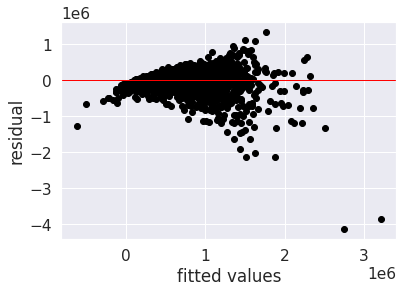

In [39]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [40]:
#Checking for hetescdasticity to determine the suitability the multiple linear regression model
test_result, p_value = bartlett(y_pred,residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value =chi2.ppf(probability, degree_of_freedom)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


### **Quantile Regression**

In [114]:
x2=houseprices_df['Sqft_Living'].values
quantile = smf.quantreg('y ~ x2', houseprices_df)
quantiles = [0.25,0.5,0.75] 
models = []
params = []
for qt in quantiles: 
	res = quantile.fit(q = qt )
	models.append(res)

	params.append([qt, res.params['Intercept'], res.params['x2']] + res.conf_int().loc['x2'].tolist())

qparams = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(qparams)

     qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.25  30432.624115  165.248227      162.939971      167.556483
1  0.50  52696.035240  216.740088      213.230524      220.249652
2  0.75  87978.723386  265.957447      261.154094      270.760799


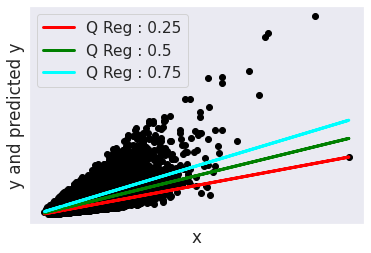

In [120]:
plt.figure(5)
plt.scatter(x2, y,  color='black')


y_pred3 = models[0].params['Intercept'] + models[0].params['x2'] * x2
plt.plot(x2, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.25')

y_pred4 = models[1].params['Intercept'] + models[1].params['x2'] * x2
plt.plot(x2, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[2].params['Intercept'] + models[2].params['x2'] * x2
plt.plot(x2, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.75')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title=("Quantile regression on data with non-constant variance")
plt.legend()

### **Ridge Regression**

In [47]:
#Finding the alpha that will be applied during penalization of l2
r1= Ridge(normalize=True)
grid_ridge =  GridSearchCV(estimator=r1, param_grid={'alpha' : np.arange(0.001, 8, 10)}, cv=10, n_jobs=1, refit=True)
grid_ridge.fit(x_train, y_train)
grid_ridge.best_params_
#The computed alpha is 0.001

{'alpha': 0.001}

In [48]:
r = Ridge(alpha=0.001, normalize=True)
r.fit(x_train, y_train)
y_pred_r = r.predict(x_test)

pred_df_r = pd.DataFrame({'Actual_price' : y_test, 'Predicted_price' : y_pred_r})
pred_df_r

,Actual_price,Predicted_price
0,680200.0,674320.525375
1,550000.0,506974.804012
2,230000.0,264462.605033
3,379950.0,448192.849445
4,1060000.0,806888.534729
...,...,...
6478,268000.0,226497.765631
6479,430000.0,461898.738355
6480,400000.0,370566.845813
6481,599832.0,708965.579473


In [49]:
coeff_r = pd.DataFrame(r.coef_, x1.columns, columns=['Coefficient'])
coeff_r

,Coefficient
Bedrooms,-38735.344755
Bathrooms,40623.992912
Sqft_Living,85.303527
Sqft_Lot,0.172055
Floors,10627.644866
Waterfront,649222.141706
View,51893.785442
Condition,28264.874636
Grade,97214.630779
Sqft_Above,87.008126


The coefficients have adjusted in the ridge regularized model

In [50]:
print(cross_val_score(r, x, y, cv=10, scoring="r2").mean())
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

0.6952709778310251
The RMSE for Linear Regressor is :  206601.04017573106


**Summary:**The R2 score is 0.7 which is above 0.5. While the RMSE of linear regression is 206599.85858395929. The RMSE of the ridge model is 206601.04017573106 which is an increase of the linear model.

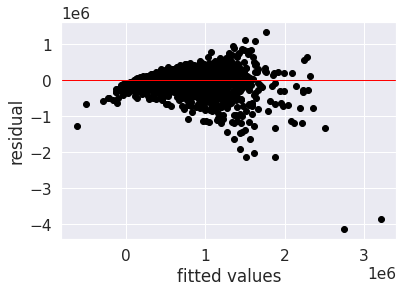

In [51]:
#plotting residuals for the ridge model
residuals_r = np.subtract(y_pred_r, y_test)
plt.scatter(y_pred_r, residuals_r, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [52]:
#Checking for hetescdasticity to determine the suitability the multiple ridge regression model
test_result, p_value = bartlett(y_pred_r,residuals_r)
degree_of_freedom = len(y_pred_r)-1
probability = 1 - p_value
critical_value =chi2.ppf(probability, degree_of_freedom)
if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


### **Lasso Regression**

In [53]:
#Finding the alpha that will be applied during penalization of l1
l1= Lasso(normalize=True)
grid_lasso =  GridSearchCV(estimator=l1, param_grid={'alpha' : np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}, cv=10, n_jobs=1, refit=True)
grid_lasso.fit(x_train, y_train)
grid_lasso.best_params_
#The computed alpha is 1.1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16587983799963.5, tolerance: 175937555260.17368
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16955632355249.75, tolerance: 179230688480.5665
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17042903885115.188, tolerance: 181150911921.16602
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1695619077

{'alpha': 1.1}

In [54]:
l = Lasso(alpha=1.1, normalize=True)
l.fit(x_train, y_train)
y_pred_l = l.predict(x_test)

pred_df_l = pd.DataFrame({'Actual_price' : y_test, 'Predicted_price' : y_pred_l})
pred_df_l

,Actual_price,Predicted_price
0,680200.0,674241.607114
1,550000.0,506942.166672
2,230000.0,264929.966540
3,379950.0,448147.060618
4,1060000.0,807388.097166
...,...,...
6478,268000.0,226520.174103
6479,430000.0,461712.575833
6480,400000.0,371175.427914
6481,599832.0,709161.337466


In [55]:
coeff_l = pd.DataFrame(l.coef_, x1.columns, columns=['Coefficient'])
coeff_l

,Coefficient
Bedrooms,-38436.149961
Bathrooms,40335.355957
Sqft_Living,149.078015
Sqft_Lot,0.160974
Floors,10274.581017
Waterfront,648818.177252
View,51860.678496
Condition,28045.970899
Grade,97479.767602
Sqft_Above,23.210069


In [56]:
print(cross_val_score(l, x, y, cv=10, scoring="r2").mean())
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

0.6952605457973877
The RMSE for Linear Regressor is :  206588.20678078252


**Summary:**The R2 score is 0.7 which is above 0.5. While the RMSE of linear regression is 206599.85858395929. The RMSE of the lasso model is 206588.20678078252 a slight decrease

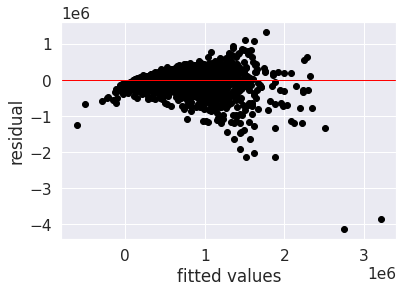

In [57]:
residuals_l = np.subtract(y_pred_l, y_test)
#plotting resuduals for the lasso model
plt.scatter(y_pred_l, residuals_l, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [58]:
#Checking for hetescdasticity to determine the suitability the multiple lasso regression model
test_result, p_value = bartlett(y_pred_l,residuals_l)
degree_of_freedom = len(y_pred_l)-1
probability = 1 - p_value
critical_value =chi2.ppf(probability, degree_of_freedom)
if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


### **Elastic Net Regression**

In [59]:
e1 = ElasticNet(normalize=True)

grid_elastic =  GridSearchCV(estimator=e1, param_grid={'alpha' : np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1))), 'l1_ratio' : [.2, .4, .6, .8] }, cv=10, n_jobs=1, refit=True)

In [60]:
#Finding the alpha that will be applied during penalization of l2
grid_elastic.fit(x_train, y_train)
grid_elastic.best_params_
#The computed alpha is 0.1

{'alpha': 0.1, 'l1_ratio': 0.8}

In [61]:
el = ElasticNet(alpha=0.1,l1_ratio=0.8, normalize=True)
el.fit(x_train, y_train)
y_pred_el = el.predict(x_test)

pred_df_el = pd.DataFrame({'Actual_price' : y_test, 'Predicted_price' : y_pred_el})
pred_df_el

,Actual_price,Predicted_price
0,680200.0,537226.594044
1,550000.0,537881.862098
2,230000.0,535846.582675
3,379950.0,540280.530766
4,1060000.0,543554.946134
...,...,...
6478,268000.0,535339.399597
6479,430000.0,535631.540577
6480,400000.0,536019.106936
6481,599832.0,542925.229987


In [62]:
coeff_el = pd.DataFrame(el.coef_, x1.columns, columns=['Coefficient'])
coeff_el

,Coefficient
Bedrooms,401.199097
Bathrooms,797.857437
Sqft_Living,0.896238
Sqft_Lot,0.002584
Floors,552.313212
Waterfront,3899.801842
View,626.203238
Condition,80.507983
Grade,672.232083
Sqft_Above,0.853090


The coefficients have adjusted in the elasicnet regularized model

In [63]:
print(cross_val_score(el, x, y, cv=10, scoring="r2").mean())
print('The RMSE for Linear Regressor is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_el)))

0.009877272542915382
The RMSE for Linear Regressor is :  373301.905635829


**Summary:**The R2 score is 0.0099 which is below 0.5. This means this model performs poorly given the data. While the RMSE of linear regression is 206599.85858395929. The RMSE of the ElasticNet model is 373301.905635829 which is a dramatic increase of the linear model.

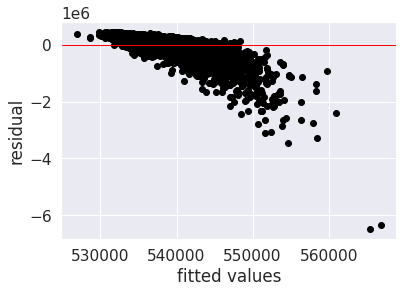

In [64]:
#plotting residuals for the ridge model
residuals_el = np.subtract(y_pred_el, y_test)
plt.scatter(y_pred_el, residuals_el, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [65]:
#Checking for hetescdasticity to determine the suitability the multiple ridge regression model
test_result, p_value = bartlett(y_pred_el,residuals_el)
degree_of_freedom = len(y_pred_el)-1
probability = 1 - p_value
critical_value =chi2.ppf(probability, degree_of_freedom)
if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


## **Conclusion**

**Accuracy and RMSEs of Multiple Linear Regression,Quantile Regression, Ridge Regression,Lasso Regression and ElasticNet Regression respectively**

In [93]:
print(le.score(x_train,y_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#Linear model has an accuracy of 70%

0.6995844804628124
RMSE: 206599.85858395929


In [95]:
print(r.score(x_train,y_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_r)))
#ridge model has an accuracy of 70% as well

0.6995839887433752
RMSE: 206601.04017573106


In [96]:
print(l.score(x_train,y_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_l)))
#lasso model has an accuracy of 70% 

0.6995809856704212
RMSE: 206588.20678078252


In [97]:
print(el.score(x_train,y_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_el)))
#The elasticnet model has an accuracy of1.6%

0.0163672742838068
RMSE: 373301.905635829


## **Recommendations**

The models linear,ridge and lasso may be used intechangably since the perform with similar accuracy. For this analysis, modeling with ElasticNet regression has been discouraged due to its poor predictive perfomance.